# Face Detection using Viola-Jones object detection with Haar Cascades
(This is face detection - Not face recognition)

## Definition
Ability to very quickly detect if a face is in an image.

However, we will not be able to recognize to whom the face belongs to. That will be done in face recognition.

## History
In 2001 Paul Viola and Michael Jones published a method of face detection based on the simply concept of a few key features.
To improve the runtime they introduced an integral image to increase performance.

## Main features types
Horizontal or vertical edges, lines and rectangles.

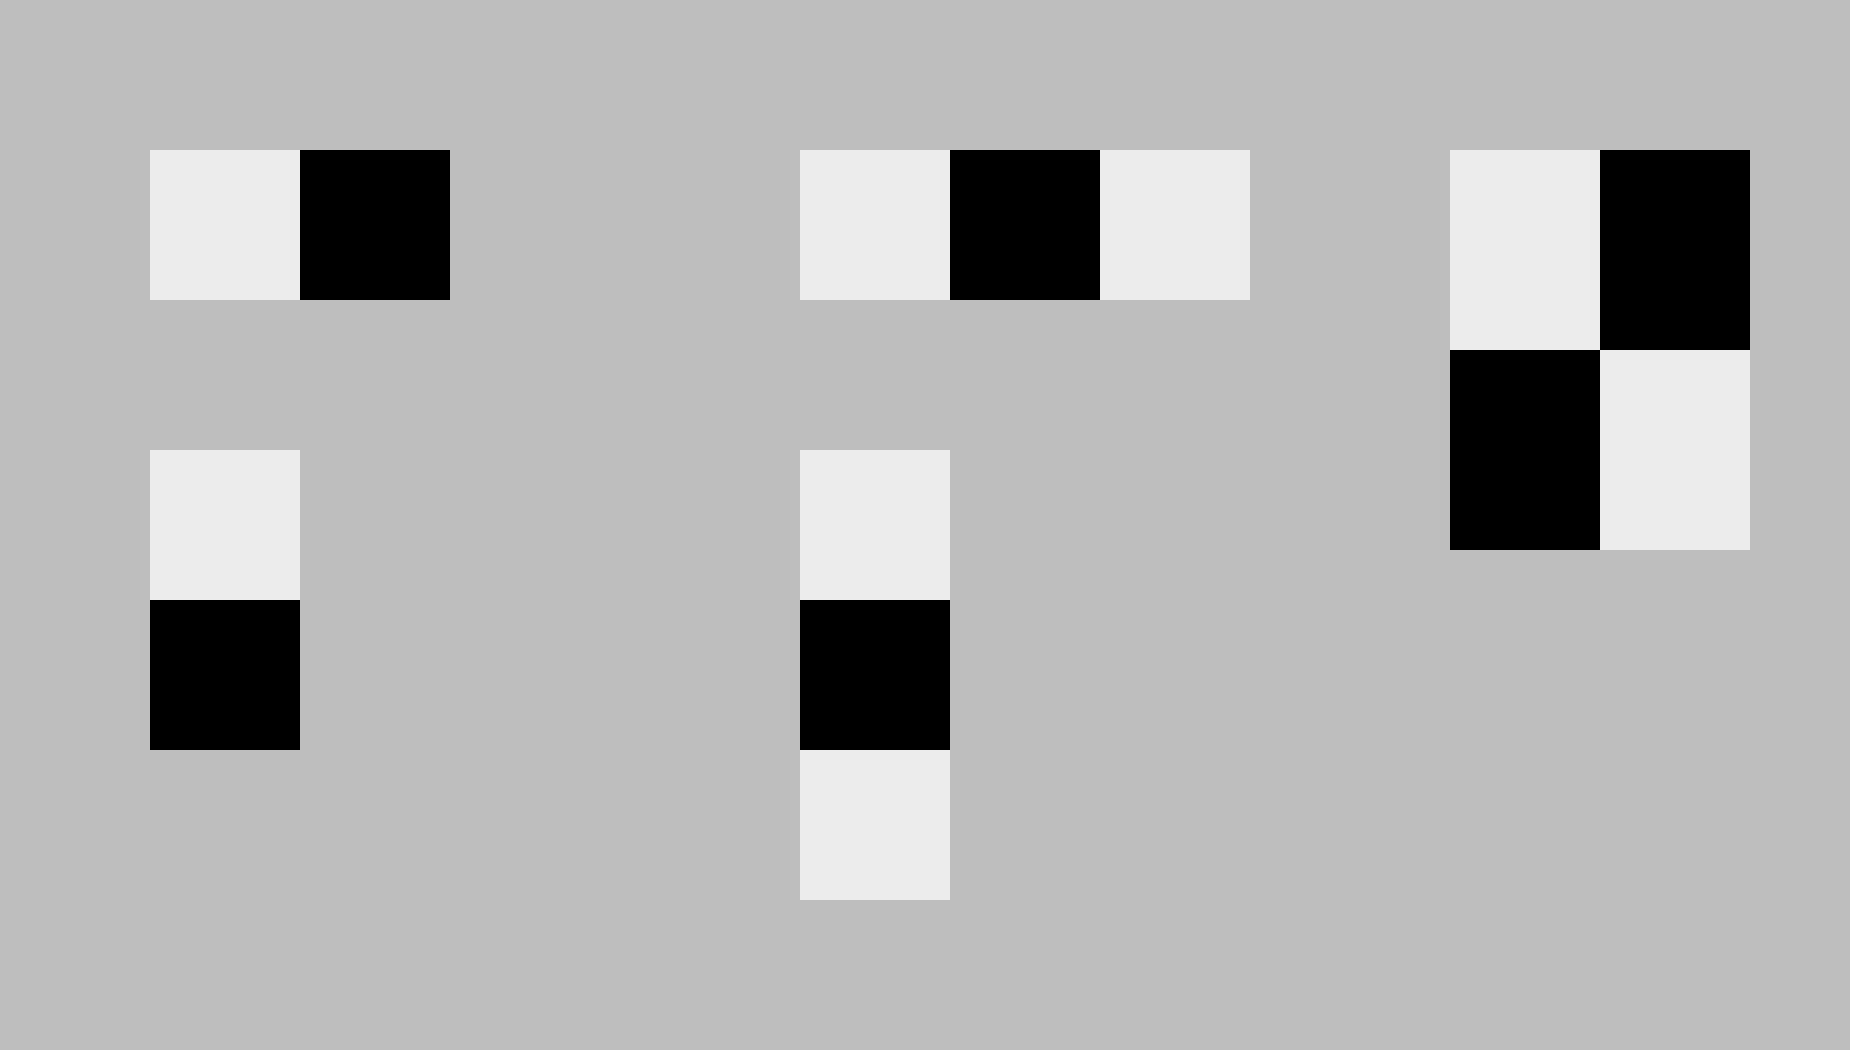

Each feature is a single value obtained by subtracting sum of pixels covered by the white rectangle from sum of pixels covered by the black rectangle.

For images there will be never a perfect edge, but more some in between like the following example:

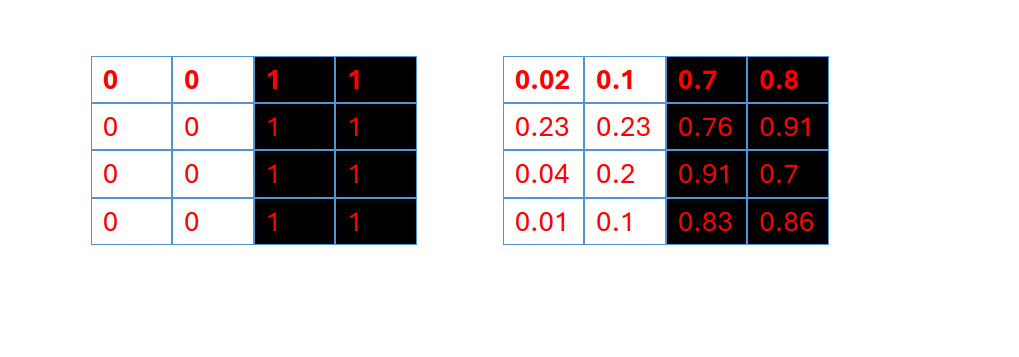

The features are calculated by subtracting the mean(dark region) - mean(light region)
The closer the value is to 1, the better is the feature.

## Integral Image
O(1) runtime by precalculating the integral image. The integral is taken from number to number. So always a sum up to the current number.

## Cascade
The algo goes through a specific cascade of classifiers. We don't go through the whole image but only the cascades of classifieres.

## Example features

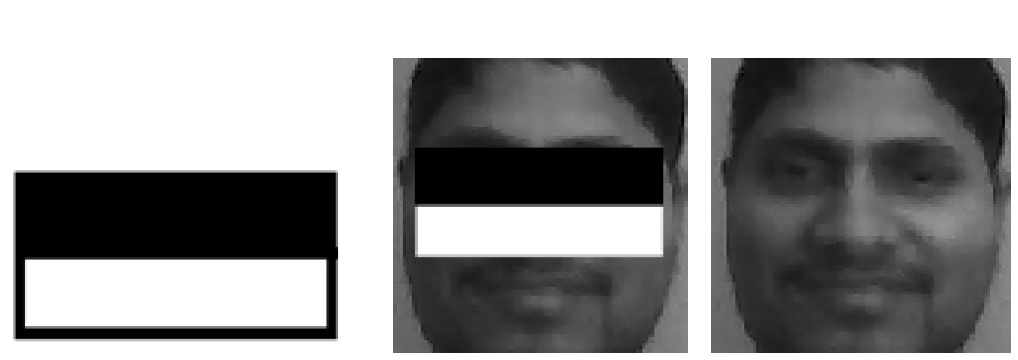

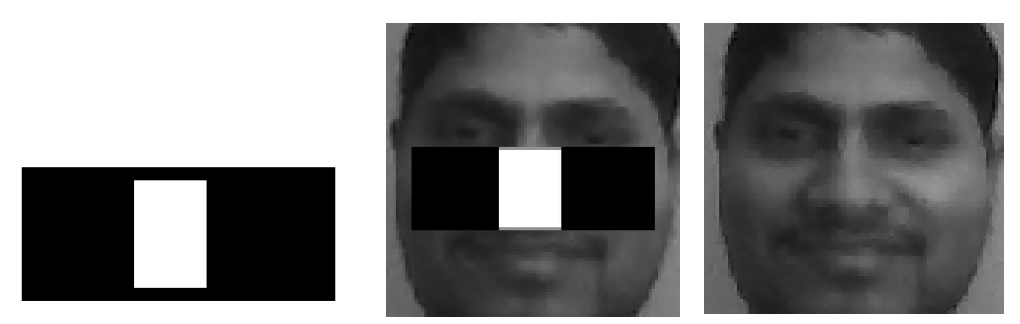

(image sources: https://en.wikipedia.org/wiki/Viola%E2%80%93Jones_object_detection_framework)

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import skimage as ski

In [3]:
astronaut = ski.data.astronaut()
astronaut = astronaut.astype(np.uint8)
astronaut = cv2.cvtColor(astronaut, cv2.COLOR_RGB2GRAY)

camera = ski.data.camera()
camera = camera.astype(np.uint8)

solvay = cv2.imread("images/solvay_conference.jpg", 0)

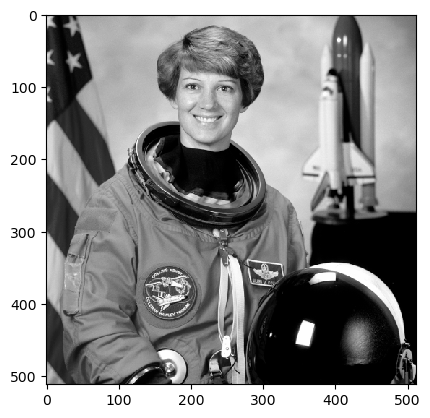

In [4]:
plt.imshow(astronaut, cmap="gray")

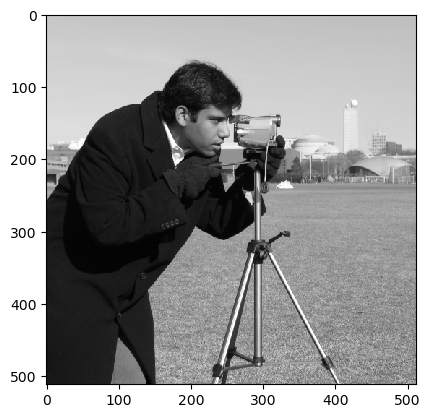

In [5]:
plt.imshow(camera, cmap="gray")

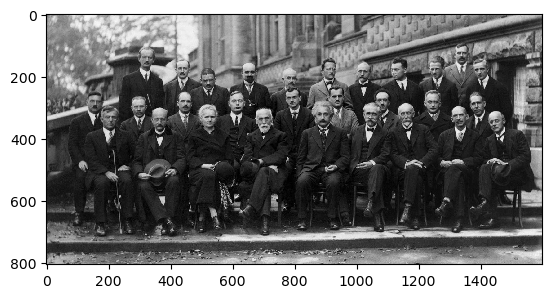

In [6]:
plt.imshow(solvay, cmap="gray")

In [10]:
# Classifier: OpenCV has also a pre-trained xml file
face_cascade = cv2.CascadeClassifier("trained_models/haarcascade_frontalface_default.xml")
# A list of 5000 features if it fits the image

In [15]:
def detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img)

    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w, y+h), (255,255,255), 10)
    
    return face_img

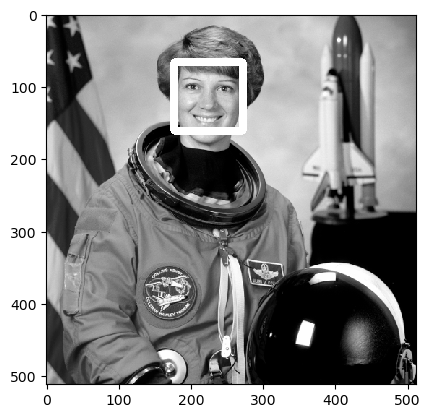

In [17]:
result = detect_face(astronaut)
plt.imshow(result, cmap="gray")

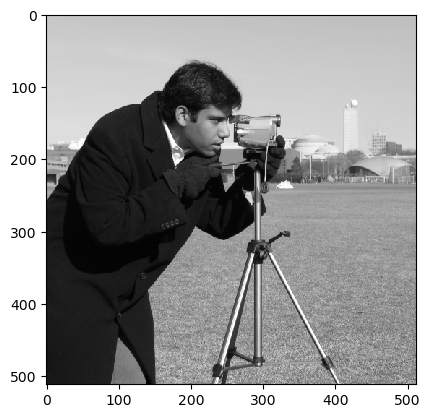

In [19]:
result = detect_face(camera)
plt.imshow(result, cmap="gray")
# Did not work - no frontal face - No detections

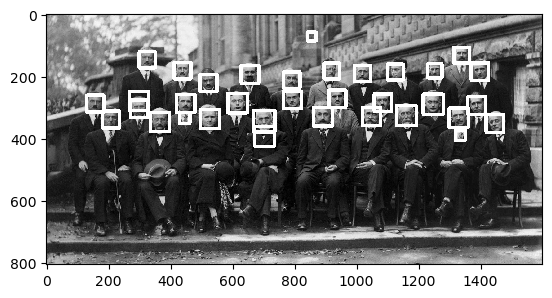

In [20]:
result = detect_face(solvay)
plt.imshow(result, cmap="gray")


In [21]:
# Multiple rectangles are sometimes detecting one face.
# Introducing a scaleFactor and a minNeighbors parameter to function detectMultiScale
def adjusted_detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=5)

    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w, y+h), (255,255,255), 10)
    
    return face_img

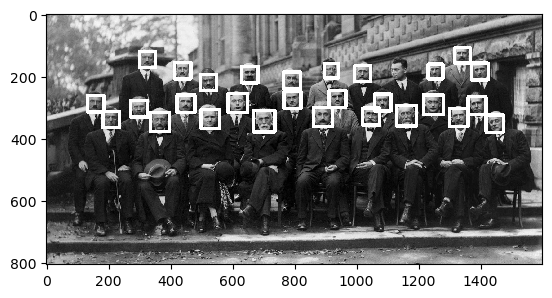

In [23]:
result = adjusted_detect_face(solvay)
plt.imshow(result, cmap="gray")
# Observation: These parameters are a trade-off since now the person looking side-ways has no association anymore.

# Eye classifier

In [27]:
eye_cascade = cv2.CascadeClassifier("trained_models/haarcascade_eye.xml")
def detect_eyes(img):
    face_img = img.copy()
    eyes_rects = eye_cascade.detectMultiScale(face_img)

    for (x,y,w,h) in eyes_rects:
        cv2.rectangle(face_img, (x,y), (x+w, y+h), (255,255,255), 10)
    
    return face_img

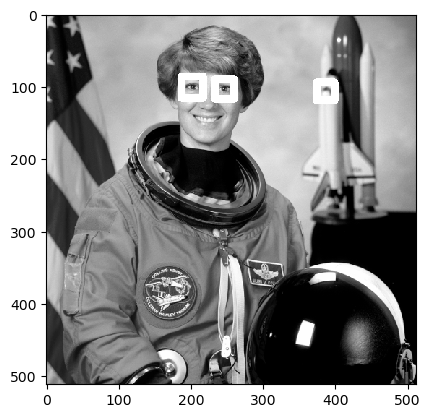

In [28]:
result = detect_eyes(astronaut)
plt.imshow(result, cmap="gray")
# Observation: detection of other features has happened as well (background rocket)
# ScaleFactor and MinNeigbors should be adapted as well

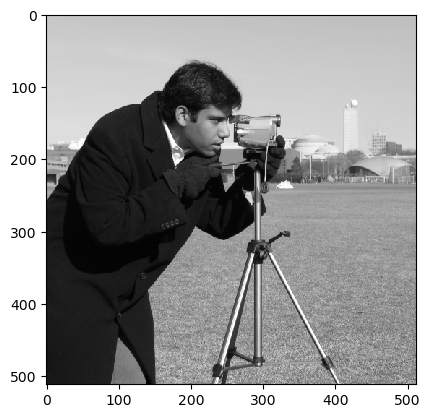

In [29]:
result = detect_eyes(camera)
plt.imshow(result, cmap="gray")
# Observation, this does not work because the main feature the eye classifier is looking at is the contrast between the white
#   of the eyes and the iris. Also the camera man is looking side-ways which disturbs the classifier even more

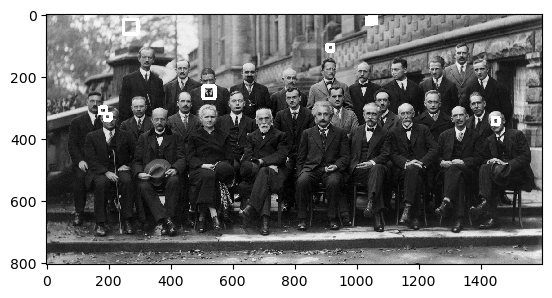

In [31]:
result = detect_eyes(solvay)
plt.imshow(result, cmap="gray")
# Observation: Works very bad 

In [ ]:
# For working with a video stream:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read(0)

    frame = detect_face(frame)

    cv2.imshow("Video Face Detect", frame)

    k = cv2.waitKey(1)
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()